<a href="https://colab.research.google.com/github/amr9410/Data_Insight_Scolarship/blob/main/NCIS_Times_Series__Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Data_Output_Template.xlsx to Data_Output_Template.xlsx
Saving LMO_Detailed_Industries_by_NAICS.xlsx to LMO_Detailed_Industries_by_NAICS.xlsx
Saving RTRA_Employ_2NAICS_00_05.csv to RTRA_Employ_2NAICS_00_05.csv
Saving RTRA_Employ_2NAICS_06_10.csv to RTRA_Employ_2NAICS_06_10.csv
Saving RTRA_Employ_2NAICS_11_15.csv to RTRA_Employ_2NAICS_11_15.csv
Saving RTRA_Employ_2NAICS_16_20.csv to RTRA_Employ_2NAICS_16_20.csv
Saving RTRA_Employ_2NAICS_97_99.csv to RTRA_Employ_2NAICS_97_99.csv
Saving RTRA_Employ_3NAICS_00_05.csv to RTRA_Employ_3NAICS_00_05.csv
Saving RTRA_Employ_3NAICS_06_10.csv to RTRA_Employ_3NAICS_06_10.csv
Saving RTRA_Employ_3NAICS_11_15.csv to RTRA_Employ_3NAICS_11_15.csv
Saving RTRA_Employ_3NAICS_16_20.csv to RTRA_Employ_3NAICS_16_20.csv
Saving RTRA_Employ_3NAICS_97_99.csv to RTRA_Employ_3NAICS_97_99.csv
Saving RTRA_Employ_4NAICS_00_05.csv to RTRA_Employ_4NAICS_00_05.csv
Saving RTRA_Employ_4NAICS_06_10.csv to RTRA_Employ_4NAICS_06_10.csv
Saving RTRA_Employ_4NAICS_11_15.csv 

# **Data Loading**

In [3]:
lmo_detailed_industry = pd.read_excel('LMO_Detailed_Industries_by_NAICS.xlsx')
lmo_detailed_industry.head()


,LMO_Detailed_Industry,NAICS
0,Farms,111 & 112
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211


In [4]:
lmo_detailed_industry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   LMO_Detailed_Industry  59 non-null     object
 1   NAICS                  59 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


In [5]:
data_output = pd.read_excel('Data_Output_Template.xlsx')
data_output.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,NaN
1,1997,1,Air transportation,NaN
2,1997,1,Ambulatory health care services,NaN
3,1997,1,"Amusement, gambling and recreation industries",NaN
4,1997,1,"Architectural, engineering and related services",NaN


In [6]:
# loading 2 digit code dataset

df2_naics = pd.read_csv('RTRA_Employ_2NAICS_00_05.csv')

employ_2_naics_files = ['RTRA_Employ_2NAICS_06_10.csv',  'RTRA_Employ_2NAICS_11_15.csv', 'RTRA_Employ_2NAICS_16_20.csv',  'RTRA_Employ_2NAICS_97_99.csv']


for i in employ_2_naics_files:
    df = pd.read_csv(i)
    df2_naics = df2_naics.append(df, ignore_index=True)

df2_naics.head()


,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,Accommodation and food services [72],148000
1,2000,1,"Administrative and support, waste management a...",59250
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750
3,2000,1,"Arts, entertainment and recreation [71]",39500
4,2000,1,Construction [23],106250


In [7]:
df2_naics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SYEAR         5472 non-null   int64 
 1   SMTH          5472 non-null   int64 
 2   NAICS         5472 non-null   object
 3   _EMPLOYMENT_  5472 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 171.1+ KB


In [8]:
# loading 3 digit code dataset

df3_naics = pd.read_csv('RTRA_Employ_3NAICS_00_05.csv')

employ_3_naics_files = ['RTRA_Employ_3NAICS_06_10.csv',  'RTRA_Employ_3NAICS_11_15.csv', 'RTRA_Employ_3NAICS_16_20.csv',  'RTRA_Employ_3NAICS_97_99.csv']
for i in employ_3_naics_files:
    df = pd.read_csv(i)
    df3_naics = df3_naics.append(df, ignore_index=True)

df3_naics.head()


,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,Aboriginal public administration[914],500
1,2000,1,Accommodation services[721],33750
2,2000,1,Administrative and support services[561],55250
3,2000,1,Air transportation[481],17500
4,2000,1,Ambulatory health care services[621],53000


In [9]:
df3_naics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28140 entries, 0 to 28139
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SYEAR         28140 non-null  int64 
 1   SMTH          28140 non-null  int64 
 2   NAICS         28140 non-null  object
 3   _EMPLOYMENT_  28140 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 879.5+ KB


In [10]:
# loading 4 digit code dataset

df4_naics = pd.read_csv('RTRA_Employ_4NAICS_00_05.csv')

employ_4_naics_files = ['RTRA_Employ_4NAICS_06_10.csv', 'RTRA_Employ_4NAICS_11_15.csv', 'RTRA_Employ_4NAICS_16_20.csv', 'RTRA_Employ_4NAICS_97_99.csv']


for i in employ_4_naics_files:
    df = pd.read_csv(i)
    df4_naics = df4_naics.append(df, ignore_index=True)

df4_naics.head()


,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,1100,500
1,2000,1,1111,0
2,2000,1,1112,2000
3,2000,1,1113,250
4,2000,1,1114,7750


In [11]:
df4_naics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85572 entries, 0 to 85571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SYEAR         85572 non-null  int64
 1   SMTH          85572 non-null  int64
 2   NAICS         85572 non-null  int64
 3   _EMPLOYMENT_  85572 non-null  int64
dtypes: int64(4)
memory usage: 2.6 MB


# **Data Wrangling**

In [12]:
# merge the output template & RITA to get the final report (data_output) for further analysis
data_output_combined = pd.merge(lmo_detailed_industry, data_output, on='LMO_Detailed_Industry', how='left')
data_output_combined.NAICS = data_output_combined.NAICS.astype('str')
data_output_combined.head()

,LMO_Detailed_Industry,NAICS,SYEAR,SMTH,Employment
0,Farms,111 & 112,1997,1,NaN
1,Farms,111 & 112,1997,2,NaN
2,Farms,111 & 112,1997,3,NaN
3,Farms,111 & 112,1997,4,NaN
4,Farms,111 & 112,1997,5,NaN


In [13]:
data_output_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15576 entries, 0 to 15575
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LMO_Detailed_Industry  15576 non-null  object 
 1   NAICS                  15576 non-null  object 
 2   SYEAR                  15576 non-null  int64  
 3   SMTH                   15576 non-null  int64  
 4   Employment             0 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 730.1+ KB


In [14]:
#merging all datasets (2/3/4 digits) to create an NCIA_code mapper for the output report for further analysis.
df_rtra_employ_total = pd.concat([df2_naics, df3_naics, df4_naics], ignore_index=True)
df_rtra_employ_total

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,Accommodation and food services [72],148000
1,2000,1,"Administrative and support, waste management a...",59250
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750
3,2000,1,"Arts, entertainment and recreation [71]",39500
4,2000,1,Construction [23],106250
...,...,...,...,...
119179,1999,12,9111,2250
119180,1999,12,9120,28500
119181,1999,12,9130,30250
119182,1999,12,9141,500


In [15]:
# iterating over the mapper to get the Employment value for each industry at each date
for index, row in data_output_combined.iterrows():
    naics = row['NAICS']
    naics_codes = list(map(str.strip, re.split(r'\D', naics)))
    year = row['SYEAR']
    month = row['SMTH']
    n_digits = len(naics_codes[0])
  
        
    # filter the data acording to  year and months we are  interested in
    df_rtra = df_rtra_employ_total.loc[(df_rtra_employ_total['SYEAR'] == year) & (df_rtra_employ_total['SMTH'] == month)]
    
    # RTRA file with four digit has different value structure for the NAICS column, it is just the value
    if n_digits != 4:
        df_rtra['naics_code'] = df_rtra.NAICS.str.split(r'\[|\]', expand=True)[1].astype("string")
    else:
        df_rtra['naics_code'] = df_rtra['NAICS'].astype("string")

    total_employment = 0
    for code in naics_codes:
        # get the value from RTRA file using year, month and naics_code
        if df_rtra[ (df_rtra['naics_code'] == code) ].shape[0] > 0:
            industry_employment_by_year_month = df_rtra[ (df_rtra['naics_code'] == code) ].iloc[0]['_EMPLOYMENT_']
            total_employment += industry_employment_by_year_month
            
    # set the total employment count value back in the output template
    data_output_combined.loc[(data_output_combined['SYEAR'] == year) & (data_output_combined['SMTH'] == month) & (data_output_combined['LMO_Detailed_Industry'] == row['LMO_Detailed_Industry']) ,  'Employment' ] = total_employment


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
data_output_combined.head()

,LMO_Detailed_Industry,NAICS,SYEAR,SMTH,Employment
0,Farms,111 & 112,1997,1,22250.0
1,Farms,111 & 112,1997,2,23750.0
2,Farms,111 & 112,1997,3,23750.0
3,Farms,111 & 112,1997,4,25500.0
4,Farms,111 & 112,1997,5,27500.0


***Useful functions***

In [17]:
#transform the data to time series
def date_formating(df):
  df['Date'] = pd.to_datetime(  df.SYEAR.astype('str') + df.SMTH.astype('str') , format='%Y%m')
  df= df.drop(columns=['SYEAR','SMTH']).sort_values('Date')   #.set_index('Date')
  df= df.astype({'Employment': 'int64'})
  return df


In [18]:
data_output_for_analysis = date_formating(data_output_combined)

In [19]:
data_output_for_analysis.head(10)

,LMO_Detailed_Industry,NAICS,Employment,Date
0,Farms,111 & 112,22250,1997-01-01
5016,Motor vehicle and parts dealers,441,26250,1997-01-01
15312,Local and Indigenous public administration,"913, 914 & 919",33000,1997-01-01
7392,"Transit, sightseeing, and pipeline transportation","485,486 & 487",11500,1997-01-01
14784,Federal government public administration,911,34750,1997-01-01
14520,"Repair, personal and non-profit services",81,89250,1997-01-01
11616,Nursing and residential care facilities,623,27250,1997-01-01
3960,Ship and boat building,3366,3500,1997-01-01
2640,Wood product manufacturing,321,48000,1997-01-01
264,"Fishing, hunting and trapping",114,4750,1997-01-01


In [20]:
data_output_for_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15576 entries, 0 to 15575
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   LMO_Detailed_Industry  15576 non-null  object        
 1   NAICS                  15576 non-null  object        
 2   Employment             15576 non-null  int64         
 3   Date                   15576 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 608.4+ KB


# **EDA**

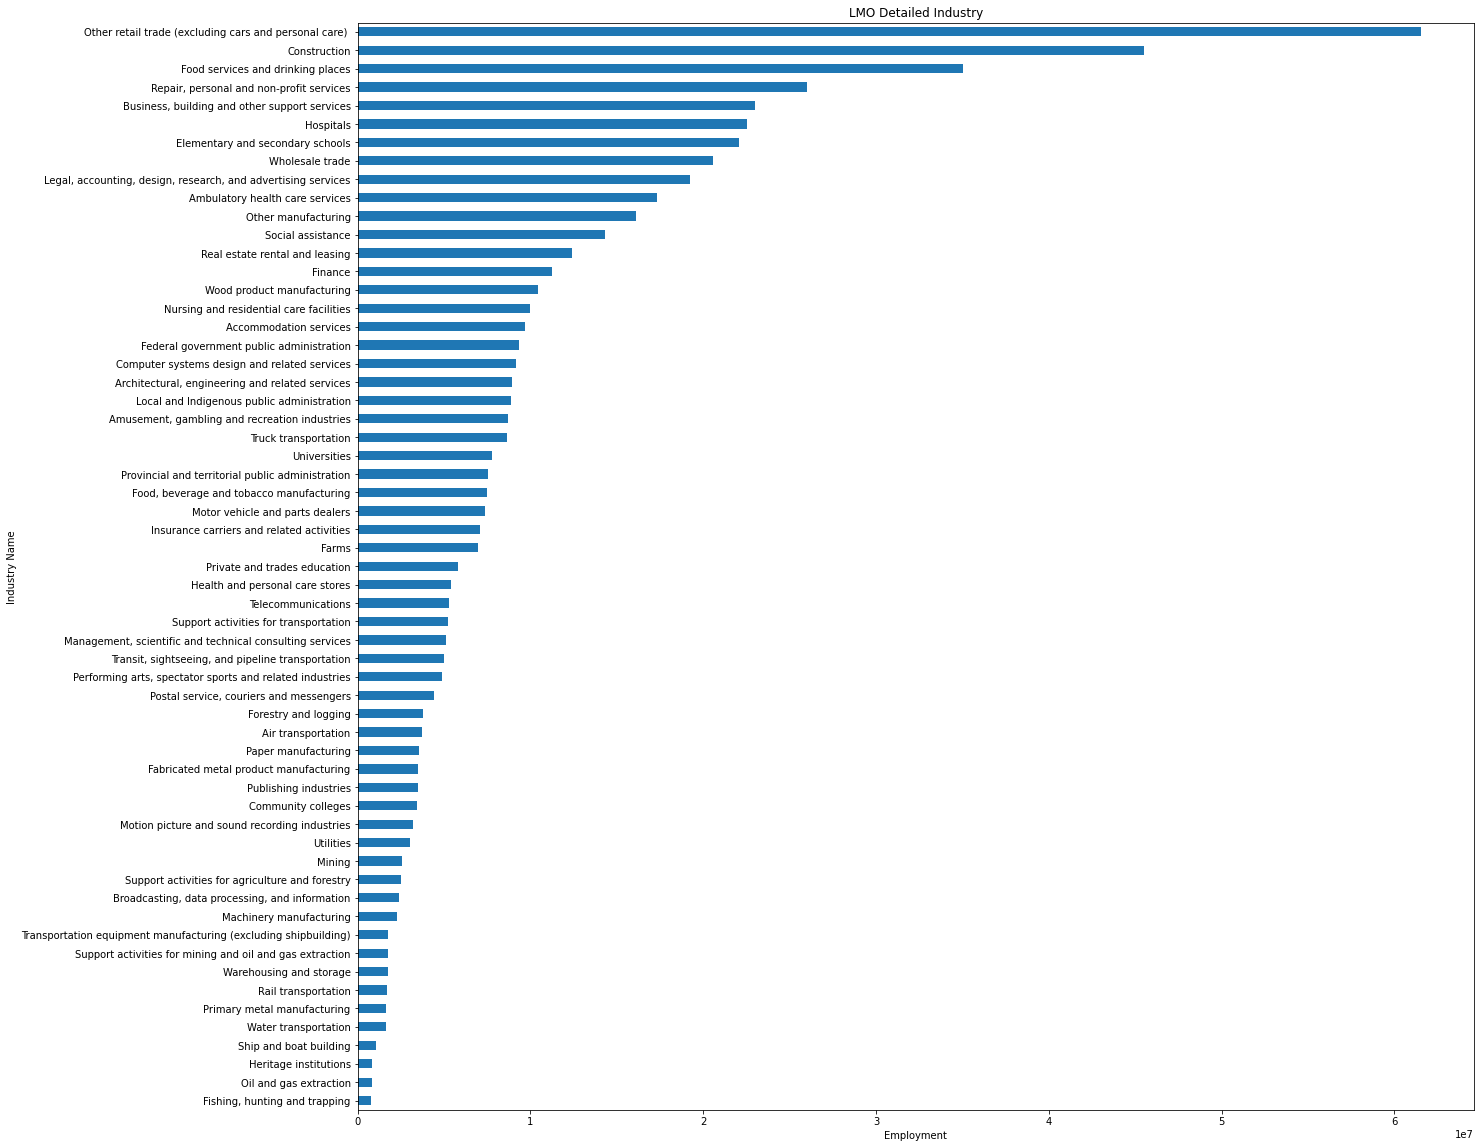

In [21]:
#overview for output report Employment for the period from 1997 till 2018
plt.figure(figsize=(20,20));
data_output_for_analysis.groupby('LMO_Detailed_Industry')['Employment'].sum().sort_values().plot.barh(x='Employment',  y='LMO_Detailed_Industry', title='LMO Detailed Industry')
plt.xlabel('Employment');
plt.ylabel('Industry Name');

# *Q1.How has employment in Construction evolved over time compared to employment in other industries?*

In [22]:
# define the construcion employment
construction= data_output_for_analysis['LMO_Detailed_Industry'] == 'Construction'
data_output_construction = data_output_for_analysis[construction]
data_output_construction.head()

,LMO_Detailed_Industry,NAICS,Employment,Date
2112,Construction,23,118000,1997-01-01
2113,Construction,23,120000,1997-02-01
2114,Construction,23,116750,1997-03-01
2115,Construction,23,125500,1997-04-01
2116,Construction,23,123750,1997-05-01


In [23]:
data_output_except_construction = data_output_for_analysis[~construction].groupby('Date')['Employment'].sum()
data_output_except_construction.head()         #['Employment'].sum()

Date
1997-01-01    1682250
1997-02-01    1690000
1997-03-01    1699000
1997-04-01    1703750
1997-05-01    1745250
Name: Employment, dtype: int64

In [24]:
data_output_construction['Percent_change'] = data_output_construction['Employment'].pct_change()
data_output_construction.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LMO_Detailed_Industry,NAICS,Employment,Date,Percent_change
2112,Construction,23,118000,1997-01-01,NaN
2113,Construction,23,120000,1997-02-01,0.016949
2114,Construction,23,116750,1997-03-01,-0.027083
2115,Construction,23,125500,1997-04-01,0.074946
2116,Construction,23,123750,1997-05-01,-0.013944


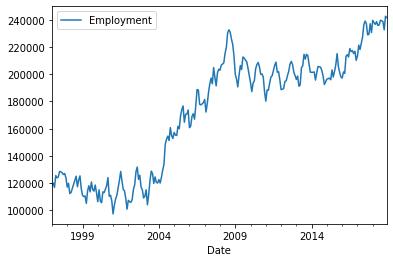

In [25]:
data_output_construction.plot( x='Date', y='Employment')

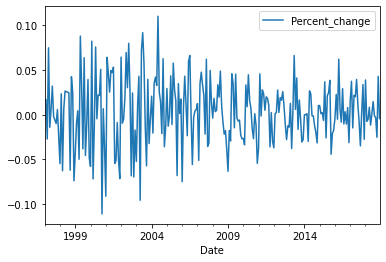

In [26]:
data_output_construction.plot( x='Date', y='Percent_change')

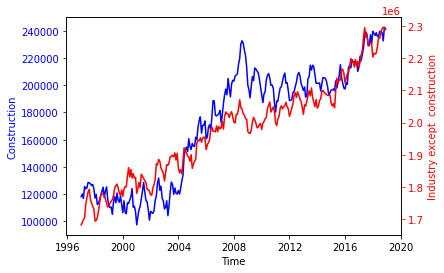

In [27]:
fig, ax = plt.subplots()
ax.plot(data_output_construction.Date, data_output_construction.Employment,  color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('Construction', color='blue')
ax.tick_params('y', colors='blue')
ax2 = ax.twinx()
ax2.plot(data_output_except_construction.index,
data_output_except_construction.values, color='red')
ax2.set_ylabel('Industry except  construction',color='red')
ax2.tick_params('y', colors='red')

***Conclusion :***

---

*Obviously, there is a significant high trend from 1997 till 2018 in the industries(except the construction) with a logical drop in 2008 ( due to the 2008 mortgage crisis ) and later on, it returns the growth back.
on the other hand, the construction industry, in general, had low values and high variability of employment from 1997 to 2004 then from 2004 to 2018 had high values with low variability* 

---










# Q2. How has employment in Real estate rental and leasing evolved over time? 

In [28]:
# define the real state employment
data_output_real_state = data_output_for_analysis[data_output_for_analysis['LMO_Detailed_Industry'] == 'Real estate rental and leasing']
data_output_real_state.head()

,LMO_Detailed_Industry,NAICS,Employment,Date
8448,Real estate rental and leasing,53,50750,1997-01-01
8449,Real estate rental and leasing,53,50500,1997-02-01
8450,Real estate rental and leasing,53,48000,1997-03-01
8451,Real estate rental and leasing,53,43500,1997-04-01
8452,Real estate rental and leasing,53,44000,1997-05-01


In [29]:
data_output_real_state['Percent_change'] = data_output_real_state['Employment'].pct_change()
data_output_real_state.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LMO_Detailed_Industry,NAICS,Employment,Date,Percent_change
8448,Real estate rental and leasing,53,50750,1997-01-01,NaN
8449,Real estate rental and leasing,53,50500,1997-02-01,-0.004926
8450,Real estate rental and leasing,53,48000,1997-03-01,-0.049505
8451,Real estate rental and leasing,53,43500,1997-04-01,-0.093750
8452,Real estate rental and leasing,53,44000,1997-05-01,0.011494


In [30]:
data_output_real_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 8448 to 8711
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   LMO_Detailed_Industry  264 non-null    object        
 1   NAICS                  264 non-null    object        
 2   Employment             264 non-null    int64         
 3   Date                   264 non-null    datetime64[ns]
 4   Percent_change         263 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 12.4+ KB


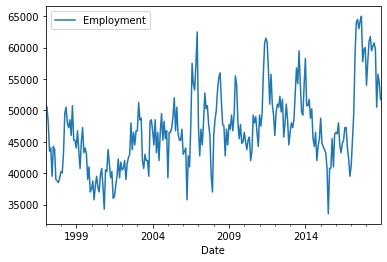

In [31]:
data_output_real_state.plot(x='Date', y='Employment')  

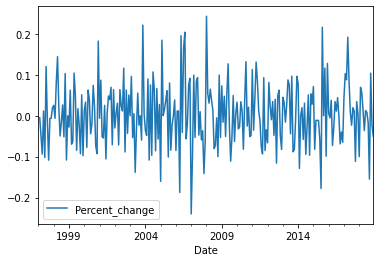

In [32]:
data_output_real_state.plot(x='Date', y='Percent_change') 

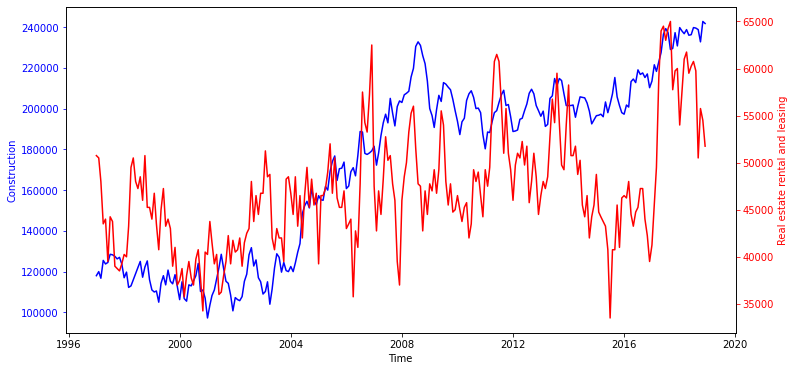

In [33]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data_output_construction.Date, data_output_construction.Employment,  color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('Construction', color='blue')
ax.tick_params('y', colors='blue')
ax2 = ax.twinx()
ax2.plot(data_output_real_state.Date,
data_output_real_state.Employment, color='red')
ax2.set_ylabel('Real estate rental and leasing',color='red')
ax2.tick_params('y', colors='red')

***Conclusion :***

---

*Employment in the real estate sector had a low trend with a very high variability*

---



# Q3.How employment in engineering evolved over time?

In [34]:
# define the real state employment
data_output_engineering = data_output_for_analysis[data_output_for_analysis['LMO_Detailed_Industry'] == 'Architectural, engineering and related services']
data_output_engineering.head()

,LMO_Detailed_Industry,NAICS,Employment,Date
8712,"Architectural, engineering and related services",5413,27000,1997-01-01
8713,"Architectural, engineering and related services",5413,27750,1997-02-01
8714,"Architectural, engineering and related services",5413,29250,1997-03-01
8715,"Architectural, engineering and related services",5413,27750,1997-04-01
8716,"Architectural, engineering and related services",5413,29750,1997-05-01


In [35]:
data_output_engineering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 8712 to 8975
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   LMO_Detailed_Industry  264 non-null    object        
 1   NAICS                  264 non-null    object        
 2   Employment             264 non-null    int64         
 3   Date                   264 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 10.3+ KB


In [36]:
data_output_engineering['Percent_change'] = data_output_engineering['Employment'].pct_change()
data_output_engineering.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LMO_Detailed_Industry,NAICS,Employment,Date,Percent_change
8712,"Architectural, engineering and related services",5413,27000,1997-01-01,NaN
8713,"Architectural, engineering and related services",5413,27750,1997-02-01,0.027778
8714,"Architectural, engineering and related services",5413,29250,1997-03-01,0.054054
8715,"Architectural, engineering and related services",5413,27750,1997-04-01,-0.051282
8716,"Architectural, engineering and related services",5413,29750,1997-05-01,0.072072


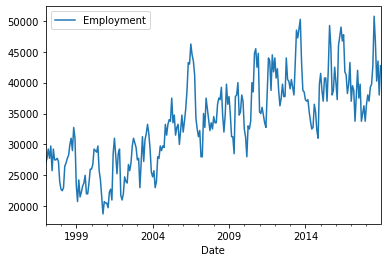

In [37]:
data_output_engineering.plot(x='Date', y='Employment')  

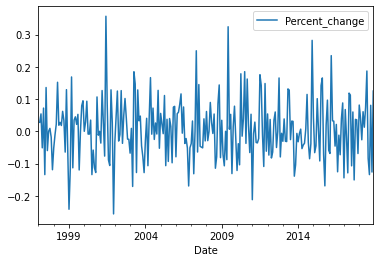

In [38]:
data_output_engineering.plot(x='Date', y='Percent_change')

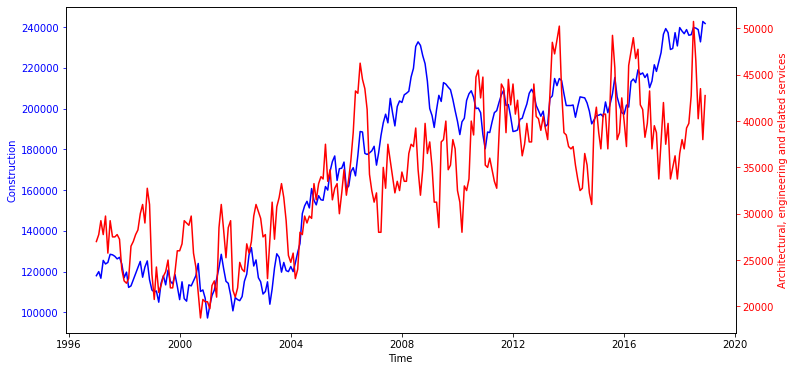

In [39]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data_output_construction.Date, data_output_construction.Employment,  color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('Construction', color='blue')
ax.tick_params('y', colors='blue')
ax2 = ax.twinx()
ax2.plot(data_output_engineering.Date, data_output_engineering.Employment, color='red')
ax2.set_ylabel('Architectural, engineering and related services',color='red')
ax2.tick_params('y', colors='red')

***Conclusion :***

---

*Employment in engineering sector followed the construction sector employment trend which makes sense but with higher variability.*

---



# Q4.How has employment in both hospital & ambulatory and healthcare services evolved over time?

In [40]:
hospital = data_output_for_analysis['LMO_Detailed_Industry'] == 'Hospitals'
data_output_hospital = data_output_for_analysis[hospital]
data_output_hospital.head()

,LMO_Detailed_Industry,NAICS,Employment,Date
11352,Hospitals,622,62000,1997-01-01
11353,Hospitals,622,61750,1997-02-01
11354,Hospitals,622,62250,1997-03-01
11355,Hospitals,622,68000,1997-04-01
11356,Hospitals,622,71000,1997-05-01


In [41]:
healthcare= data_output_for_analysis['LMO_Detailed_Industry'] == 'Ambulatory health care services'
data_output_healthcare = data_output_for_analysis[healthcare]
data_output_healthcare.head()

,LMO_Detailed_Industry,NAICS,Employment,Date
11088,Ambulatory health care services,621,40000,1997-01-01
11089,Ambulatory health care services,621,40500,1997-02-01
11090,Ambulatory health care services,621,42750,1997-03-01
11091,Ambulatory health care services,621,40750,1997-04-01
11092,Ambulatory health care services,621,46750,1997-05-01


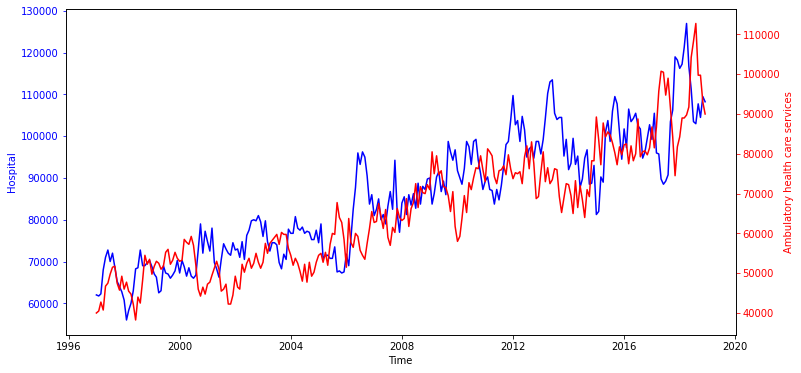

In [42]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data_output_hospital.Date, data_output_hospital.Employment,  color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('Hospital', color='blue')
ax.tick_params('y', colors='blue')
ax2 = ax.twinx()
ax2.plot(data_output_healthcare.Date, data_output_healthcare.Employment, color='red')
ax2.set_ylabel('Ambulatory health care services',color='red')
ax2.tick_params('y', colors='red')

***Conclusion***

---

*Employment in both hospitals& Ambulatory health care services almost identical in values and variability ,which make sense*

---



# Q5.How has employment in both univerisities & elemenetary  and secondary schools evolved over time?

In [43]:
univerisity= data_output_for_analysis['LMO_Detailed_Industry'] == 'Universities'
data_output_univerisity = data_output_for_analysis[univerisity]
data_output_univerisity.head()

,LMO_Detailed_Industry,NAICS,Employment,Date
10560,Universities,6113,16500,1997-01-01
10561,Universities,6113,17500,1997-02-01
10562,Universities,6113,19500,1997-03-01
10563,Universities,6113,17000,1997-04-01
10564,Universities,6113,20250,1997-05-01


In [44]:
schools= data_output_for_analysis['LMO_Detailed_Industry'] == 'Elementary and secondary schools'
data_output_schools = data_output_for_analysis[schools]
data_output_schools.head()

,LMO_Detailed_Industry,NAICS,Employment,Date
10032,Elementary and secondary schools,6111,78250,1997-01-01
10033,Elementary and secondary schools,6111,79500,1997-02-01
10034,Elementary and secondary schools,6111,81000,1997-03-01
10035,Elementary and secondary schools,6111,81000,1997-04-01
10036,Elementary and secondary schools,6111,82000,1997-05-01


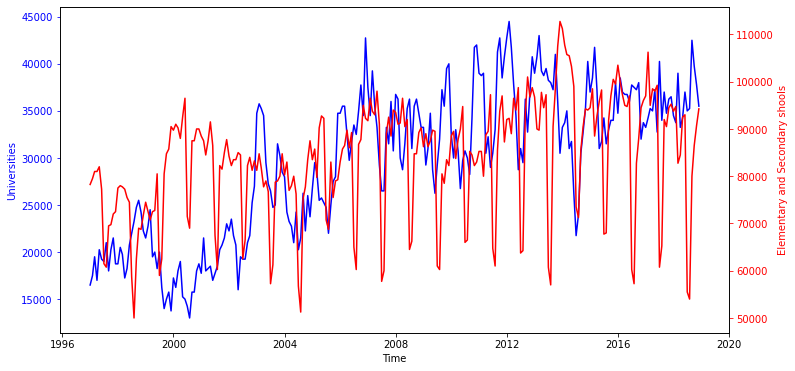

In [45]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data_output_univerisity.Date, data_output_univerisity.Employment,  color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('Universities', color='blue')
ax.tick_params('y', colors='blue')
ax2 = ax.twinx()
ax2.plot(data_output_schools.Date, data_output_schools.Employment, color='red')
ax2.set_ylabel('Elementary and Secondary shools',color='red')
ax2.tick_params('y', colors='red')

**Conclusion**


---

*Employment in both universities sector  & elementary and secondary schools sector are completely unmatched in values and variability due to the nature of education system in NCIS as that all secondary school graduateds would not join the high education/univerisities*

---

